# Pytorch 卷积神经网络
pytorch卷积神经网络（Convolutional Neural Network，CNN）是深度学习中专门用于处理具有网络状拓扑结构数据（如图像、视频等）的模型。
CNN通过卷积操作提取特征，具有参数共享和局部连接的优势，能够有效地捕捉空间层次结构的信息。

CNN 是计算机视觉任务（如图像分类、目标检测和图像分割等）的核心技术。如下图所示，CNN 由卷积层、池化层和全连接层等组成。卷积层用于提取特征，池化层用于降维和减少计算量，全连接层用于分类或回归任务。

![CNN structure](<assets/CNN.jpeg>)

在图中，CNN 的输出层给出了三个类别的概率：Donald(0.2)、Goofy(0.1)、Tweety(0.7)，表示输入图像属于 Tweety 类别的概率最大。

各个部分的简要说明：
- **输入图像（Input Image）**：输入的图像数据，通常是一个多维数组（张量），包含图像的像素值。
- **卷积层（Convolutional Layer）**：通过卷积操作提取图像的特征，使用多个卷积核（滤波器）对输入图像进行卷积运算，生成特征图（Feature Map）。
- **池化层（Pooling Layer）**：通常在卷积层之后，通过池化操作（如最大池化或平均池化）对特征图进行下采样，减少特征图的尺寸，同时保留重要特征，从而降低计算复杂度和防止过拟合，并生成池化特征图（Pooled Feature Map）。
- **特征提取（Feature Extraction）**：通过多层卷积和池化操作的组合，逐步提取图像的高级特征；
- **展平层（Flatten Layer）**：将多维的特征图展平为一维向量，以便输入到全连接层；
- **全连接层（Fully Connected Layer）**：类似于传统的神经网络层，用于将提取到的特征（展平得到的数据）映射到输出类别；
- **分类器（Classifier）**：网络的输出层，根据全连接层的输出进行分类，通常使用 softmax 函数将输出转换为概率分布，表示每个类别的预测概率；
- **输出概率（Output Probabilities）**：表示输入图像属于各个类别的概率分布，通常是一个向量，长度等于类别数。根据最大概率值确定最终的分类结果。

## 1. 卷积神经网络的基本结构
1. **输入层**：输入图像数据，通常是一个多维数组（张量），其中两个维度表示图像的高度和宽度，第三个维度表示颜色通道（如 RGB 图像有三个通道）。
2. **卷积层**：用卷积核提取局部特征，如边缘、纹理等。 
   $$
   y[i, j]=\sum_{m=0}^{k-1}\sum_{n=0}^{k-1}x[i+m,j+n]\cdot k[m,n]+b
   $$
   其中，$x$ 为输入图像，$k$ 为卷积核（权重矩阵），$i,j$ 是输出特征图的坐标，$b$ 为偏置。
   应用一组可学习的卷积核（滤波器）对输入图像进行卷积操作，以提取局部特征生成多个特征图（Feature Map）。每个卷积核在输入图像上滑动，计算卷积操作，生成对应的特征图。每个卷积核提取不同的特征，多个卷积核可以提取多种特征，最终组成一个特征图集合。
3. **激活函数**：通常在卷积层之后应用非线性激活函数，如 ReLU (Rectified Linear Unit)，以引入非线性特征。ReLU 函数的定义为：$$
   f(x)=\max(0,x)
   $$
   通过激活函数，网络可以学习到更复杂的特征。
4. **池化层**：
   - 用于降低特征图的空间维度，减少计算量和参数数量，同时保留重要的特征信息；
   - 常用的池化操作有最大池化（Max Pooling）和平均池化（Average Pooling）；
   - 最大池化选择区域内的最大值，平均池化计算区域内的平均值；
5. **归一化层**（可选）：用于加速计算和提高模型的稳定性；
   - 如批归一化（Batch Normalization）和局部响应（Local Response Normalization），用于加速训练和提高模型的稳定性；
   - 批归一化通过对每个小批量的输入进行标准化，使其均值为 0，方差为 1，从而加速训练过程；
   - 局部响应归一化通过对每个神经元的输出进行归一化，使其在空间上具有更好的对比度，从而提高模型的性能；
6. **展平层**（Flatten Layer）：将多维的特征图展平为一维向量，以便输入到全连接层；
   - 将卷积层和池化层提取到的特征进行整合，通常在网络的最后几层使用；
   - 展平操作将多维数组转换为一维数组，以便输入到全连接层；
7. **全连接层**（Fully Connected Layer）：将卷积层和池化层提取到的特征进行整合，通常在网络的最后几层使用；
   - 将展平后的特征图输入到全连接层，进行分类或回归任务；
   - 全连接层的输出通常经过 softmax 函数转换为概率分布，用于多分类任务；
   - 全连接层的每个神经元都与前一层的所有神经元相连，用于综合特征并进行最终的分类或回归；
8.  **输出层**：根据任务的不同，输出层可以有不同的形式
   - 根据全连接层的输出进行分类，分类任务通常使用 softmax 函数将输出转换为概率分布，表示每个类别的预测概率；
9.  **损失函数**：用于评估模型的性能，计算预测值与真实值之间的差异；
   - 常用的损失函数有交叉熵损失（Cross-Entropy Loss）和均方误差损失（Mean Squared Error Loss）等；
   - 交叉熵损失用于分类任务，均方误差损失用于回归任务；
10. **优化器**：用于根据损失函数的梯度更新模型参数；
    - 常用的优化器有随机梯度下降（SGD）、Adam、RMSprop 等；
    - 优化器通过计算损失函数的梯度，更新模型参数，以最小化损失函数；
11. **正则化**（regularization，可选）：用于防止过拟合；
    - 常用的正则化方法有 L1 正则化、L2 正则化和 dropout 等；
    - L1 和 L2 正则化通过在损失函数中添加正则项，限制模型的复杂度；
    - Dropout 在训练过程中随机丢弃一部分神经元，以减少模型对特定神经元的依赖，从而提高模型的泛化能力；

CNN的深度和复杂性可以根据任务的需求进行调整，通常包含多个卷积层、池化层和全连接层的组合。深度学习框架（如 PyTorch、TensorFlow 等）提供了方便的 API 来构建和训练 CNN 模型。

## 2. Pytorch实现CNN实例

建立一个简单的CNN模型，用于MNIST数据集的数字分类，主要步骤如下：
- 数据加载和预处理：使用`torchvision`库加载MNIST数据集，并进行必要的预处理，如归一化和转换为张量；
- 定义CNN模型：使用`torch.nn`模块定义卷积神经网络的结构，包括卷积层、池化层和全连接层；
- 定义损失函数和优化器：使用交叉熵损失函数和随机梯度下降（SGD）优化器；
- 训练模型：使用训练数据对模型进行训练，计算损失并更新模型参数；
- 评估模型：使用测试数据评估模型的性能，计算准确率；
- 可视化结果：使用`matplotlib`库可视化训练过程中的损失和准确率变化；
- 保存和加载模型：使用`torch.save`和`torch.load`函数保存和加载训练好的模型参数；

具体代码实现如下：
1. 导入必要的库
2. 数据加载
3. 定义CNN模型
4. 定义损失函数和优化器
5. 训练模型
6. 测试模型
7. 可视化结果
8. 保存和加载模型

In [5]:
# import the necessary libraries and load the MNIST dataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets

transform = transforms.Compose([
    transforms.ToTensor(),                    # convert the image to a tensor
    transforms.Normalize((0.5,), (0.5,))      # normalize the image to have mean 0.5 and std 0.5
])

# load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [7]:
# defin the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # defin the convolutional layers: input 1 channel, output 32 channels, kernel size 3x3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # define the second convolutional layer: input 32 channels, output 64 channels, kernel size 3x3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # define the fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)          # input size 
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))                # the first convolutional layer + ReLU activation
        x = F.max_pool2d(x, 2)                   # max pooling with kernel size 2x2
        x = F.relu(self.conv2(x))                # the second convolutional layer + ReLU activation
        x = F.max_pool2d(x, 2)                   # max pooling with kernel size 2x2
        x = x.view(-1, 64 * 7 * 7)               # flatten the tensor
        x = F.relu(self.fc1(x))                  # the first fully connected layer + ReLU activation
        x = self.fc2(x)                          # the second fully connected layer
        return x                                 # return the output
    
# create an instance of the model
model = SimpleCNN()

In [9]:
# -*- coding: utf-8 -*-
# define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()            # loss function use cross entropy
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # optimizer use SGD with momentum, set learning rate to 0.01 and momentum to 0.9

In [10]:
# -*- coding: utf-8 -*-
# train the model
# train the model for 5 epochs, and print the loss every epoch

num_epochs = 5
model.train()  # set the model to training mode

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')
        


Epoch [1/5], Loss: 0.2550
Epoch [2/5], Loss: 0.0558
Epoch [3/5], Loss: 0.0392
Epoch [4/5], Loss: 0.0289
Epoch [5/5], Loss: 0.0236


In [11]:
# -*- coding: utf-8 -*-
# test the model
# set the model to evaluation mode
model.eval()
correct = 0
total = 0

with torch.no_grad():  # no need to calculate gradients during evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 99.03%


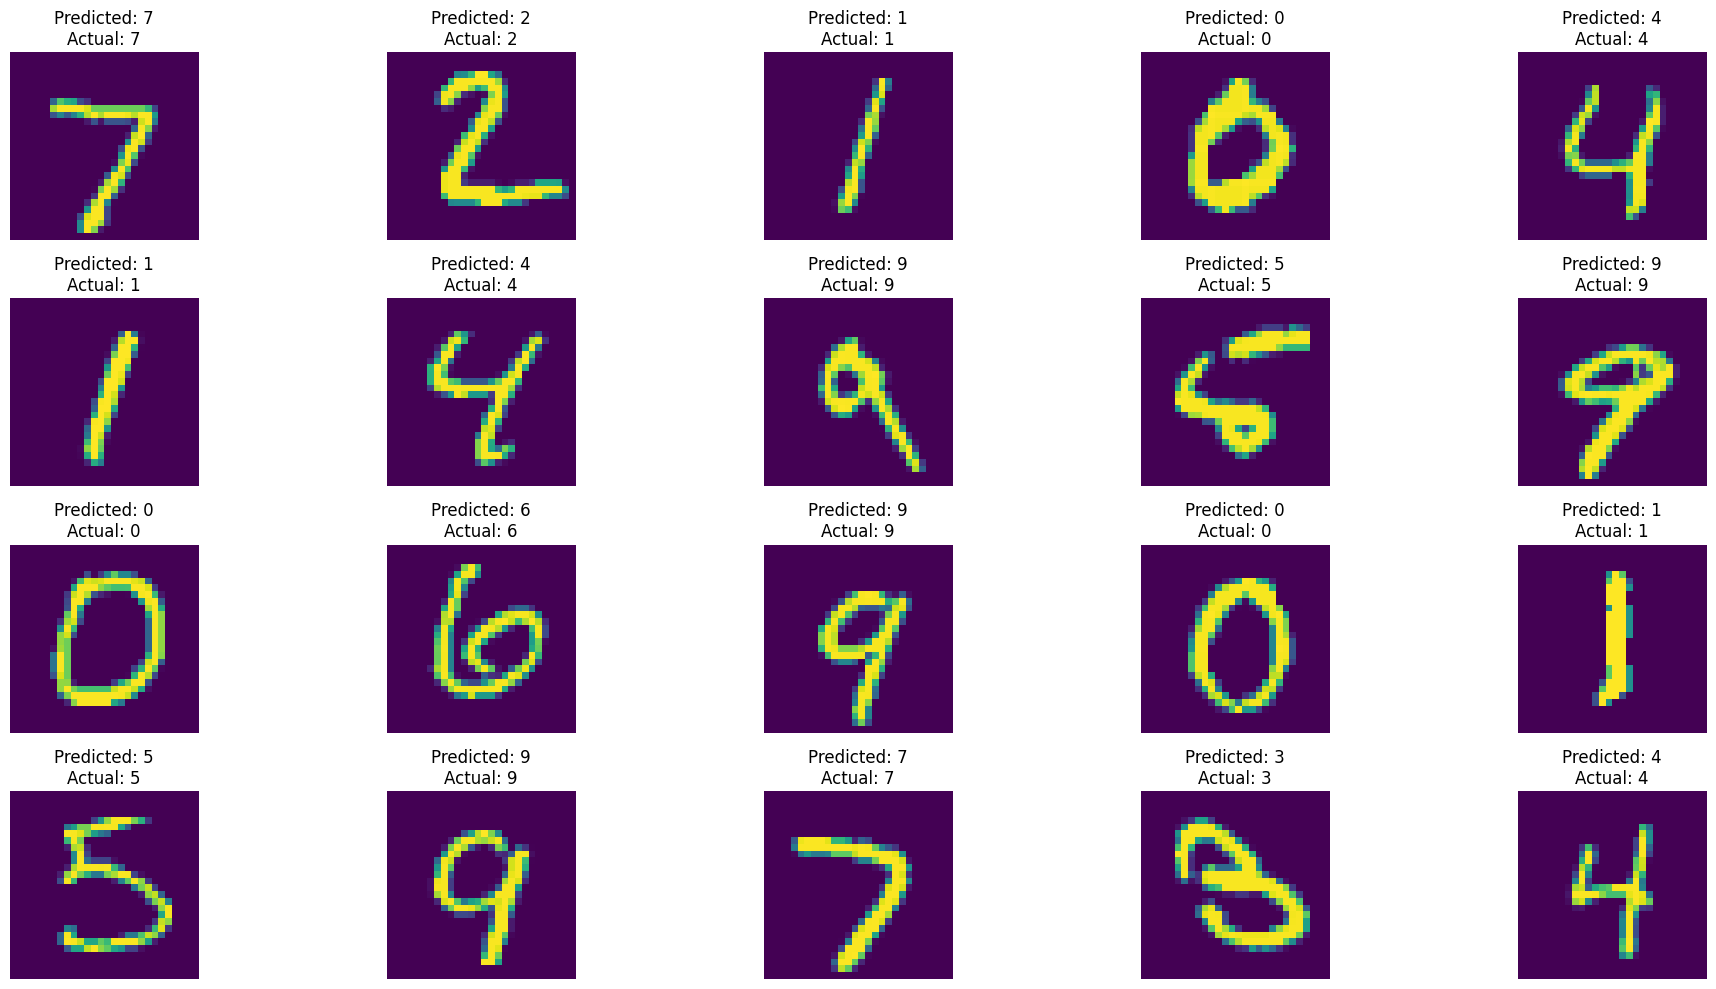

In [15]:
# -*- coding: utf-8 -*-
# visualize some predictions
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# plot the first 20 images and their predicted labels
fig, axes = plt.subplots(4, 5, figsize=(20, 10))
for i in range(20):
    axes[i//5, i%5].imshow(np.transpose(images[i].cpu().numpy(), (1, 2, 0)))
    axes[i//5, i%5].set_title(f'Predicted: {predicted[i]}\nActual: {labels[i]}')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()